In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [34]:
data = pd.read_csv("bike_buyers.csv")

In [ ]:
data.info() #последние действие выводится на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


# 1). Data cleanup

Remove rows with NaN:

In [ ]:
data2 = data.dropna(axis=0) #удаляем "ненужные" строчки (где встречается хоть одно пустое значение)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   Marital Status    952 non-null    object 
 2   Gender            952 non-null    object 
 3   Income            952 non-null    float64
 4   Children          952 non-null    float64
 5   Education         952 non-null    object 
 6   Occupation        952 non-null    object 
 7   Home Owner        952 non-null    object 
 8   Cars              952 non-null    float64
 9   Commute Distance  952 non-null    object 
 10  Region            952 non-null    object 
 11  Age               952 non-null    float64
 12  Purchased Bike    952 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.1+ KB


 Сheck that columns have the correct data type:

In [ ]:
data3 = data2.astype({'Marital Status': 'string', 'Gender': 'string', 'Income': 'int64', 'Children': 'int64', 'Education': 'string', 'Occupation': 'string', 'Home Owner': 'string', 'Cars': 'int64', 'Commute Distance': 'string', 'Region': 'string', 'Age': 'int64', 'Purchased Bike': 'string'})
data3.info() #меняю все float64(), object() на int64(), string()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                952 non-null    int64 
 1   Marital Status    952 non-null    string
 2   Gender            952 non-null    string
 3   Income            952 non-null    int64 
 4   Children          952 non-null    int64 
 5   Education         952 non-null    string
 6   Occupation        952 non-null    string
 7   Home Owner        952 non-null    string
 8   Cars              952 non-null    int64 
 9   Commute Distance  952 non-null    string
 10  Region            952 non-null    string
 11  Age               952 non-null    int64 
 12  Purchased Bike    952 non-null    string
dtypes: int64(5), string(8)
memory usage: 104.1 KB


Редактирую Commute Distance

# 2). Descriptive statistics

Mean, median and standard deviation of the fields

In [ ]:
arr = ['Income', 'Children', 'Cars', 'Age']
Mean = []
Std = []
Median = []

In [ ]:
for i in arr:
    Mean.append(data3[i].mean())
    Std.append(data3[i].std())
    Median.append(data3[i].median())

In [ ]:
table = pd.DataFrame({'Mean':Mean, 'Std':Std, 'Median':Median})
table = table.rename(index={0:'Income', 1:'Children', 2:'Cars', 3:'Age'})

In [ ]:
table

,Mean,Std,Median
Income,55903.361345,30845.483596,60000.0
Children,1.898109,1.620426,2.0
Cars,1.452731,1.111962,1.0
Age,44.256303,11.428167,43.0


In [ ]:
data3.describe()

,ID,Income,Children,Cars,Age
count,952.000000,952.000000,952.000000,952.000000,952.000000
mean,19979.940126,55903.361345,1.898109,1.452731,44.256303
std,5334.000279,30845.483596,1.620426,1.111962,11.428167
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15310.250000,30000.000000,0.000000,1.000000,35.000000
50%,19747.500000,60000.000000,2.000000,1.000000,43.000000
75%,24531.500000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


# 3). Plots

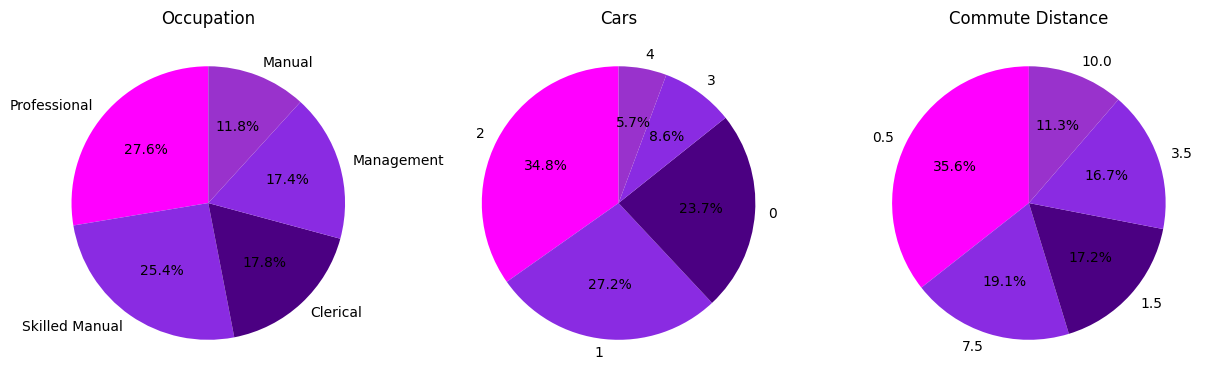

In [ ]:
# Создание трех подграфиков (графиков в ряд)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

custom_colors = ['magenta', 'blueviolet', 'indigo', 'blueviolet', 'darkorchid']

# Построение круговой диаграммы для каждого подграфика
axs[0].pie(data3['Occupation'].value_counts().values, labels=data3['Occupation'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = custom_colors)
axs[1].set_title('Cars')
axs[0].set_title('Occupation')

axs[1].pie(data3['Cars'].value_counts().values, labels=data3['Cars'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = custom_colors)
axs[1].set_title('Cars')

axs[2].pie(data3['Commute Distance'].value_counts().values, labels=data3['Commute Distance'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = custom_colors)
axs[2].set_title('Commute Distance')

plt.show()

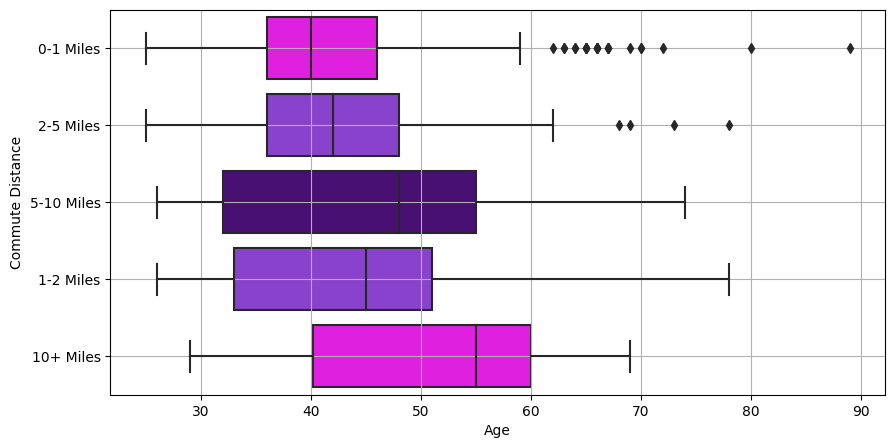

In [ ]:
plt.figure(figsize=(10, 5))

# Создаем ящиковую диаграмму
sns.boxplot(x=data['Age'], y=data['Commute Distance'], orient="h", palette= ['magenta', 'blueviolet', 'indigo', 'blueviolet', 'magenta'])

plt.grid()
plt.show()

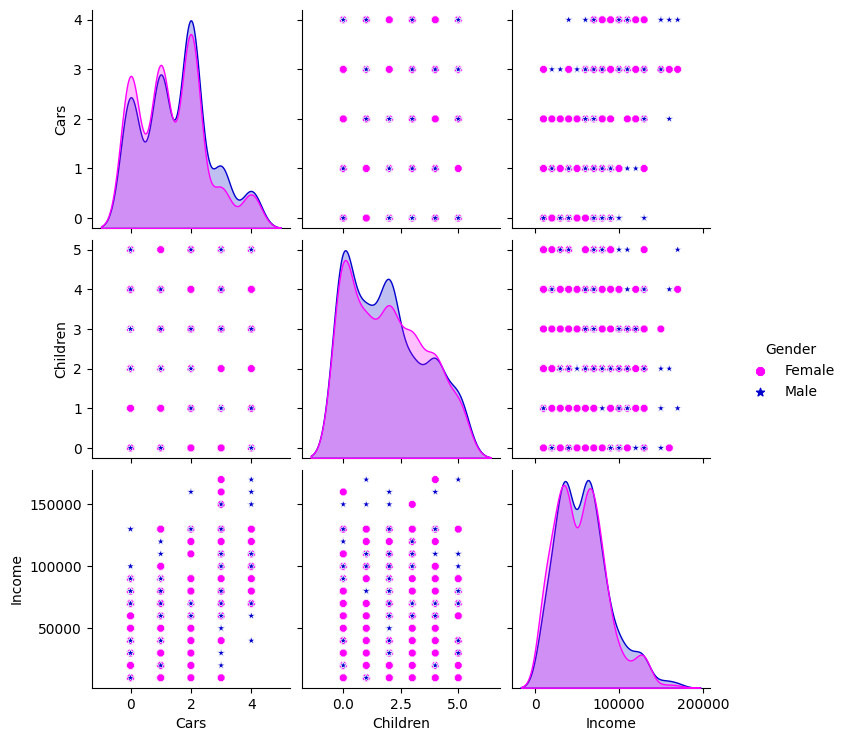

In [ ]:
keys = ['Cars', 'Children', 'Income', 'Gender']

# Use the palette parameter in pairplot
n = sns.pairplot(data[keys], hue='Gender', markers=["8", "*"], palette = {'Male': 'mediumblue', 'Female': 'magenta'})

plt.show()


# 4). Detailed overview

In [ ]:
# Готовлю данные с разделением (м/ж) для популяционной пирамиды
male = data3[data3['Gender'] == "Male"].groupby("Age").count()
male["ID"].to_numpy()
ageM = male.index.to_numpy()
ageM

female = data3[data3['Gender'] == "Female"].groupby("Age").count()
female["ID"].to_numpy()
ageF = female.index.to_numpy()
ageF

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 78, 80, 89])

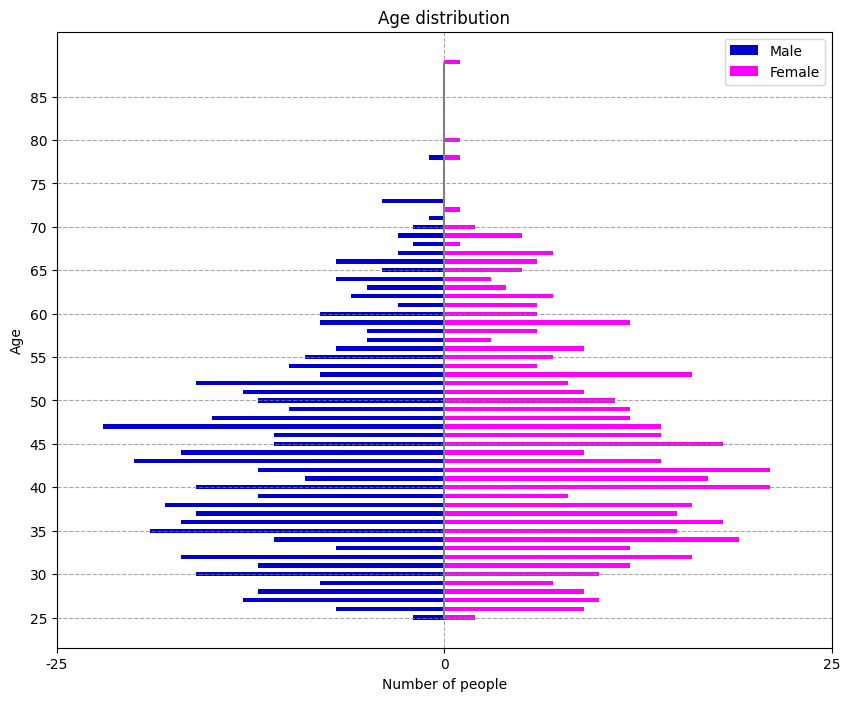

In [ ]:
# Генерируем искусственные данные для популяционной пирамиды
ageM = male.index.to_numpy()
ageF = female.index.to_numpy()
male_population = male["ID"].to_numpy()
female_population = female["ID"].to_numpy()

# Инвертируем данные о мужском населении, чтобы отобразить их на левой стороне пирамиды
male_population = -male_population

fig, ax = plt.subplots(figsize=(10, 8))

# Создаем график популяционной пирамиды
ax.barh(ageM, male_population, height=0.5, label='Male', color='mediumblue')
ax.barh(ageF, female_population, height=0.5, label='Female', color='magenta')

# ax.hist(ageM, male_population, height=0.5, label='Male', color='mediumblue',orientation='horizontal',bins=10)
# ax.hist(ageF, female_population, height=0.5, label='Female', color='magenta',orientation='horizontal',bins=10)


# Добавляем центральную линию для справки
ax.vlines(0, ymin= min(ageM[0], ageF[0]), ymax= max(ageM[-1], ageF[-1]), color='gray')

# Возвращаем ось x для мужчин, чтобы показать положительные значения
ax.set_xticks([ -25, 0, 25])
ax.set_xticklabels([-25, 0, 25])

ax.set_yticks(np.arange(25, 90, 5))
ax.set_yticklabels(np.arange(25, 90, 5))

# Устанавливаем метки
ax.set_xlabel('Number of people')
ax.set_ylabel('Age')
ax.set_title('Age distribution')

ax.legend(loc='upper right') # В правом вверхнем углу Males/Females

ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.7) # Создаю сетку

plt.show() # Показываем график

Add column using lambda

In [ ]:
data3['PeopleNumber'] = data3.apply(lambda x: 2 + x["Children"] if x["Marital Status"] == "Married" else 1+ x["Children"], axis=1)

In [ ]:
data3["Income per person"] = data3.apply(lambda x: x["Income"] / x["PeopleNumber"], axis=1)

In [ ]:
data3.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,2Commute Distance,PeopleNumber,Income per person
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,0.360259,3,13333.333333
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,0.535107,5,6000.000000
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,3.525180,7,11428.571429
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,0.171961,1,30000.000000
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No,1.958766,4,2500.000000


Add column using other functions....

In [31]:
import random
def rep(x):
  if not(isinstance(x,str)):
    return x
  if "Miles" in x:
    x = x.replace("Miles", "")
  x=x.replace("+","")
  x=x.split("-")
  if len(x)==1:
    return int(x[0])
  else:
    return  random.random() + random.randint(int(x[0]), int(x[1])-1)
    # return (int(x[0])+int(x[1]))/2

data3["2Commute Distance"] = data3["Commute Distance"].apply(rep)
data3["2Commute Distance"]

0       0.891604
1       0.928745
2       2.571257
4       0.193190
5       1.962419
         ...    
994     1.942239
995     2.428995
996     3.423929
998     1.938873
999    10.000000
Name: 2Commute Distance, Length: 952, dtype: float64

<Axes: xlabel='Income per person', ylabel='2Commute Distance'>

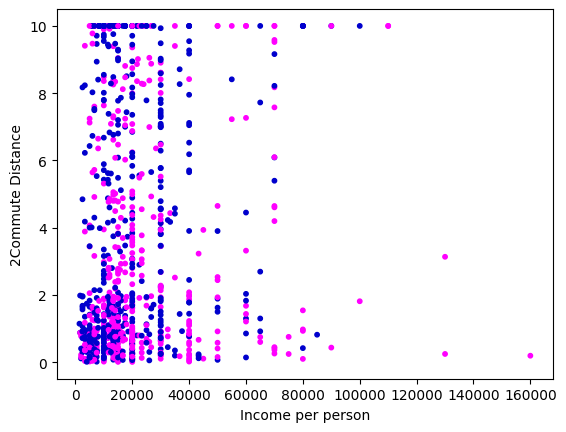

In [32]:
# Draw a scatter plot
data3.plot.scatter(x = 'Income per person', y = "2Commute Distance", s = 10, c = data3['Purchased Bike'].apply(lambda x: 'magenta' if x == "Yes" else 'mediumblue'))

# Остальное

<ipython-input-33-fe927c299355>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  c = ax.scatter(x = "2Commute Distance", y = "Age", s= 10, cmap='hsv', alpha = 1)


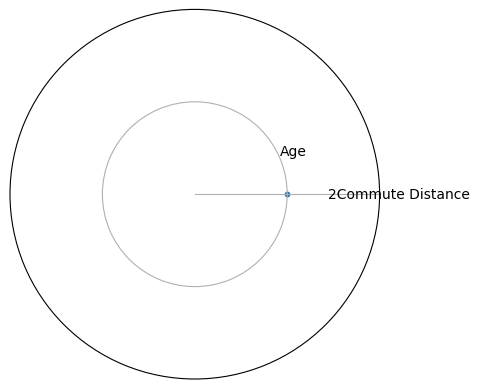

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(x = "2Commute Distance", y = "Age", s= 10, cmap='hsv', alpha = 1)

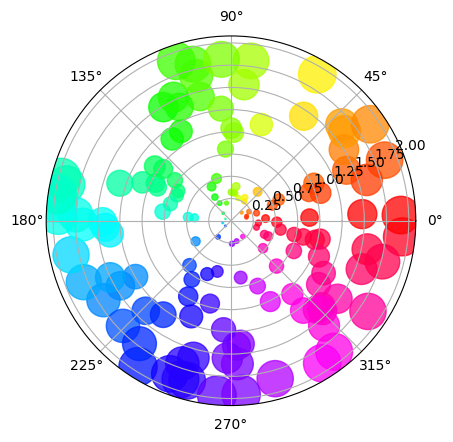

In [ ]:
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)